# Metrics for clustring 
## Silhouette Score
> Measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).
- Range: -1 to 1
  - Closer to 1: better clustering
  - Around 0: overlapping clusters
  - Negative: wrong clustering

$$

\huge {\text{Silhouette Score} = \frac{b - a}{\max(a, b)}}
$$

- $a$ is the average distance between a point and all other points in its cluster (cohesion)
  - average intra-cluster distance
- $b$ is the average distance between a point and all points in the next nearest cluster (separation)
  - average nearest-cluster distance

## Calinski-Harabasz Score (Variance Ratio Criterion)
> Ratio of between-cluster dispersion to within-cluster dispersion

- Higher is better

$$
\huge {CH = \frac{tr(B_k)}{tr(W_k)} . \frac{n-k}{k-1}}
$$

- $n$ number of samples
- $k$ number of clusters
- $tr()$ the trace of a square matrix is the sum of its diagonal elements.
  - $tr(A)=\sum_{i=1}^{n} A_{ii}$
- $tr(B_k) trace of between-group dispersion matrix
  - total inter-cluster variance
  - Between-cluster scatter matrix $B_k$ how far cluster centroids are from the overall mean
- $tr(W_k) trace of within-group dispersion matrix
  - total intra-cluster variance
  - Within-cluster scatter matrix $W_k$ how compact the data is around its own cluster center
- Which means: higher between-cluster variance and lower within-cluster variance → better clusters.

## Within-Cluster Sum of Squares (WCSS)

and others...

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
pro_data_mall = pd.read_csv('../Processed_datasets/mall_customer_segmentation/processed_data.csv')
pro_data_mall.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


In [6]:
pro_data_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    float64
 1   Annual Income (k$)      200 non-null    float64
 2   Spending Score (1-100)  200 non-null    float64
 3   Gender                  200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [17]:
import warnings
# Silence warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Inertia:  [438.52241155677746, 344.405428869535, 254.28290726083478, 216.7849015165104, 181.9514362434146, 164.77658348793943, 153.1195442545863, 142.21262833357423, 132.60985315269122]
Silhouette Score:  [0.30319765641607566, 0.3142800845203407, 0.3502702043465398, 0.34977050035201074, 0.356485834425401, 0.3346555570188711, 0.3367567190885339, 0.332448045759479, 0.3142584256734506]
Calinski Harabasz Score:  [95.16047848869201, 87.19416925256019, 101.4872647305155, 97.25832335913094, 99.65487851108833, 94.58176379136616, 88.87808912112808, 85.1276967481362, 82.25241653294354]


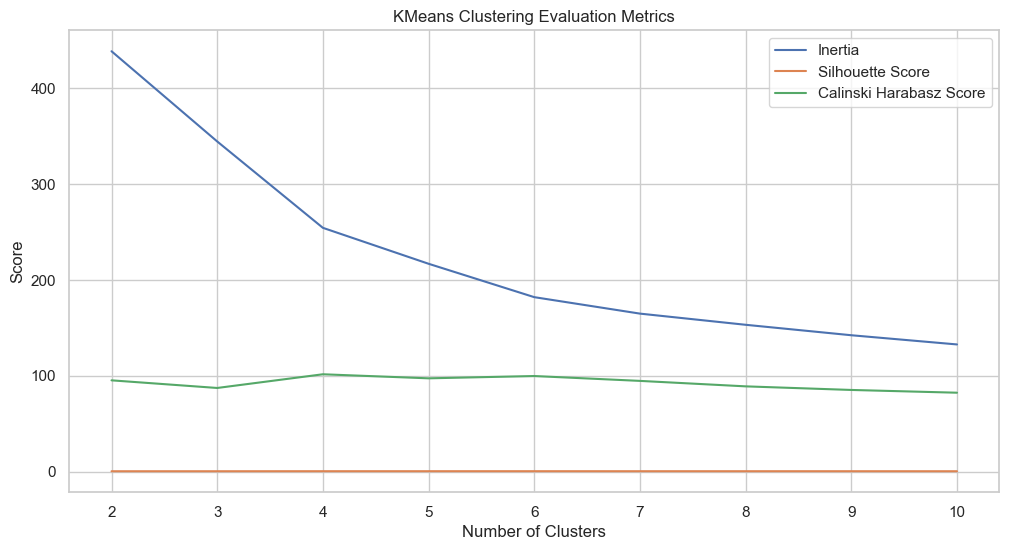

In [18]:
# inttialization
kmeans_models = [KMeans(n_clusters=k, random_state=42) for k in range(2, 11)] 
# fit the models
X = pro_data_mall.copy()
kmeans_models = [model.fit(X) for model in kmeans_models] 
# get the labels
kmeans_labels = [model.labels_ for model in kmeans_models]
# get the inertia (WCSS)
kmeans_inertia = [model.inertia_ for model in kmeans_models]
# get the silhouette score
kmeans_silhouette = [silhouette_score(X, labels) for labels in kmeans_labels]
# get the calinski harabasz score
kmeans_calinski = [calinski_harabasz_score(X, labels) for labels in kmeans_labels]

# print the results
print("Inertia: ", kmeans_inertia)
print("Silhouette Score: ", kmeans_silhouette)
print("Calinski Harabasz Score: ", kmeans_calinski)
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(kmeans_inertia, label='Inertia')
plt.plot(kmeans_silhouette, label='Silhouette Score')
plt.plot(kmeans_calinski, label='Calinski Harabasz Score')
plt.title('KMeans Clustering Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(range(0, 9), range(2, 11))
plt.legend()
plt.show()



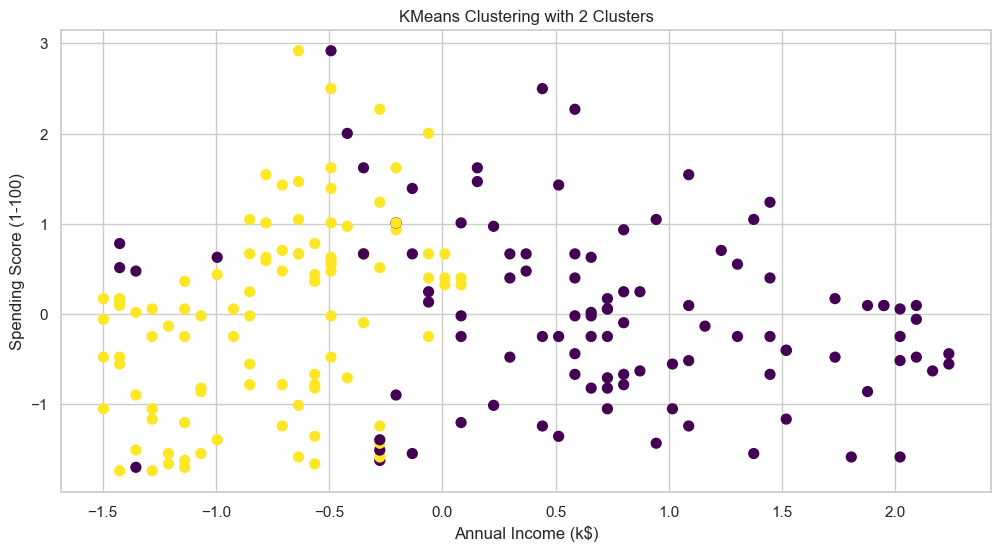

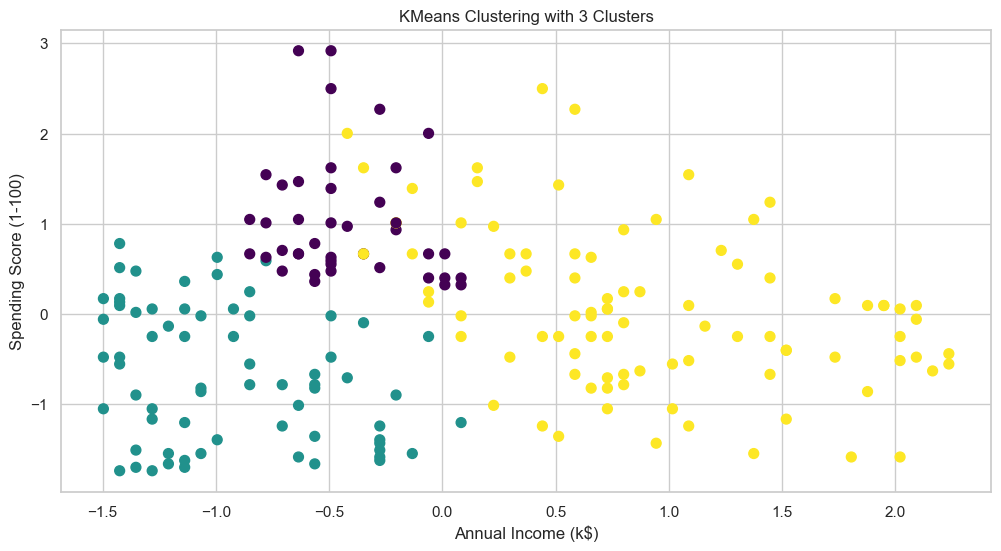

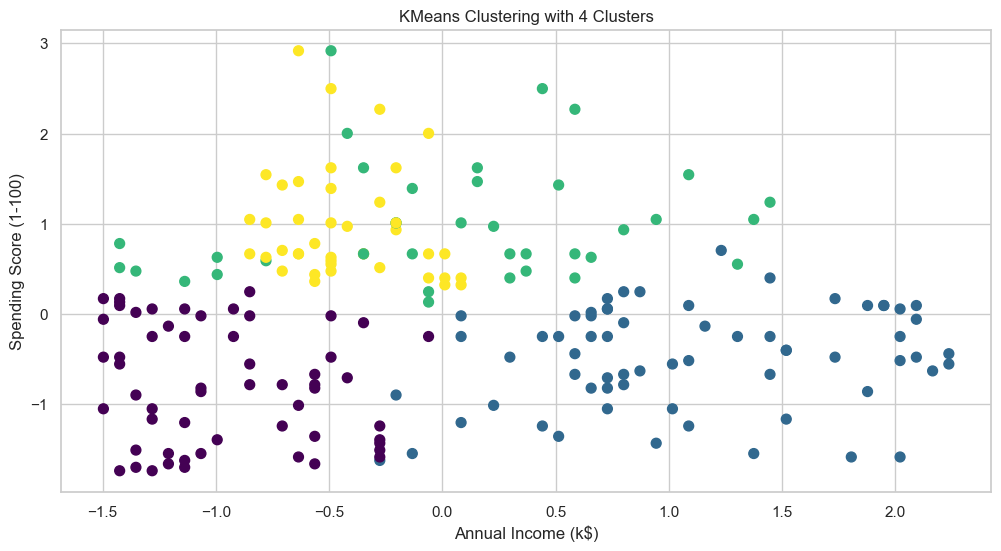

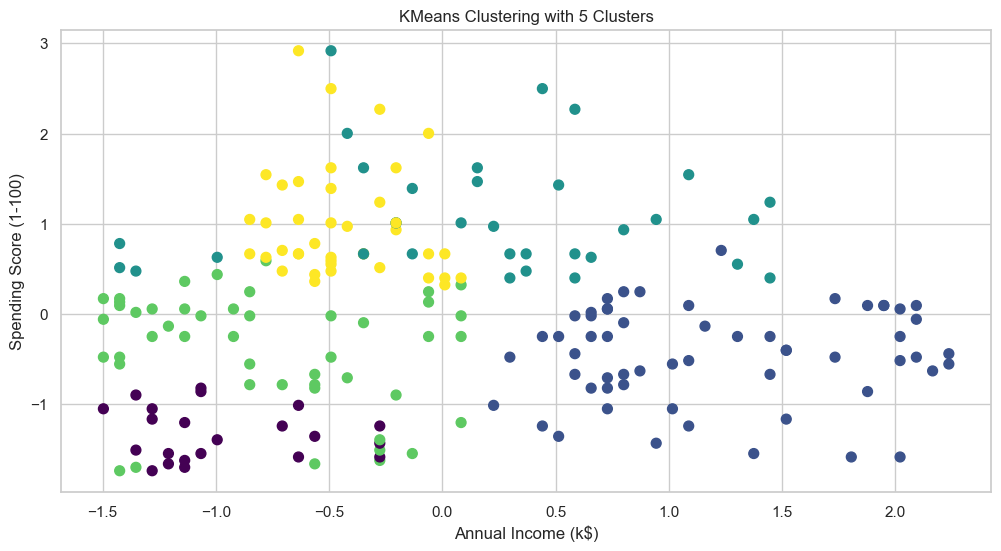

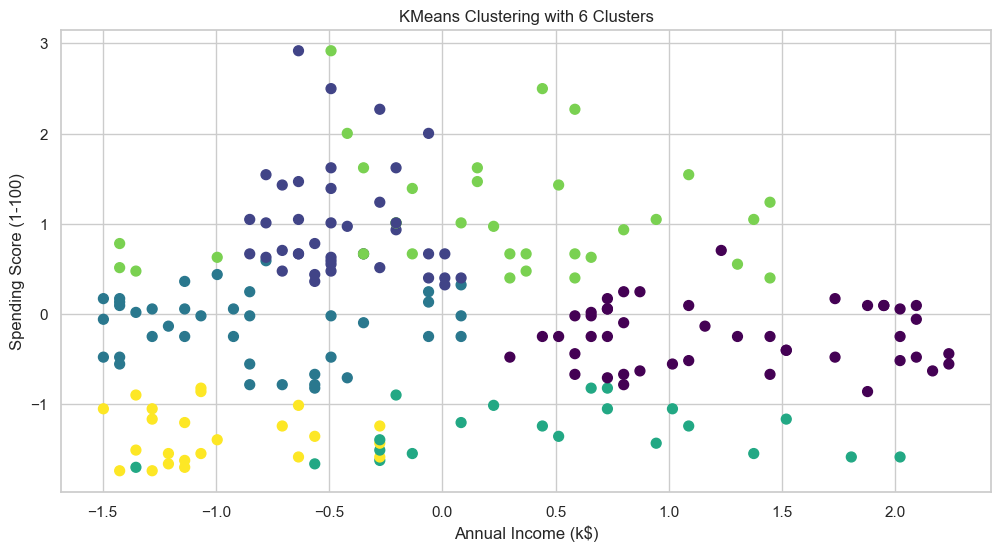

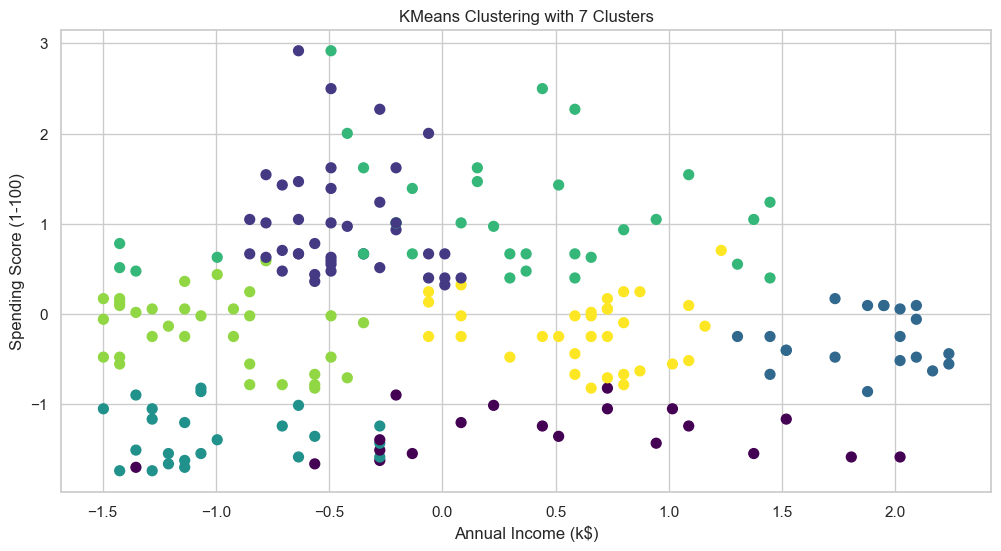

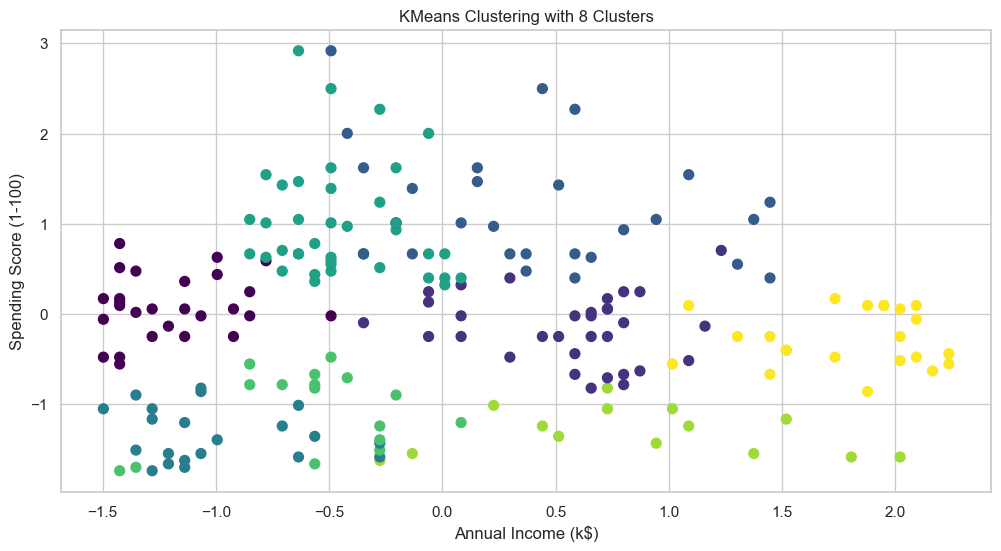

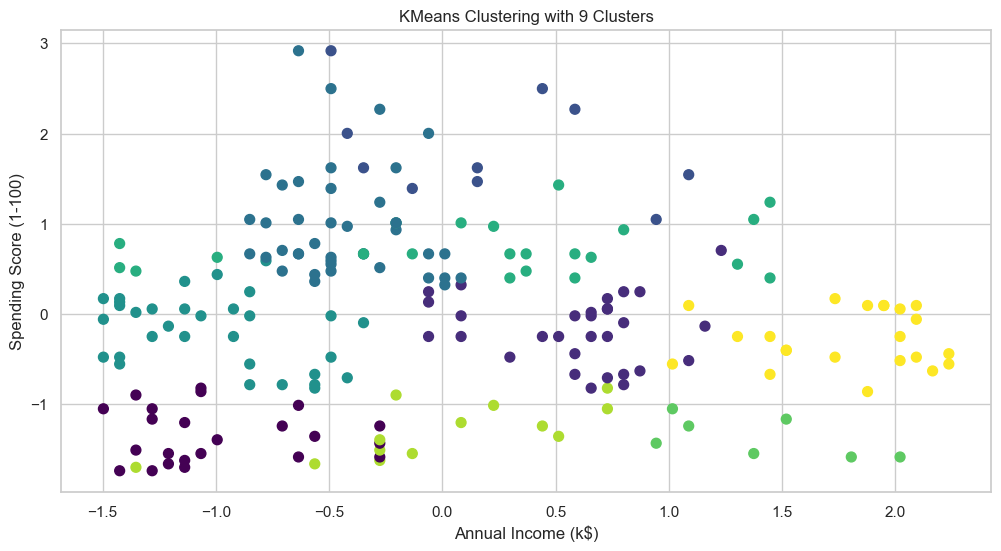

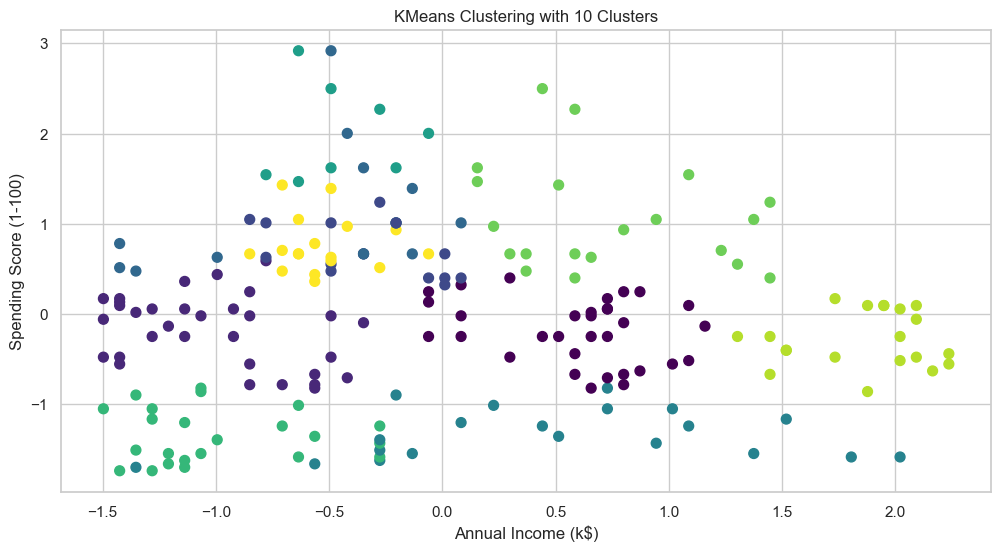

In [14]:
# plot the cluster for all the models
for model in kmeans_models:
    plt.figure(figsize=(12, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.labels_, cmap='viridis', s=50)
    plt.title(f'KMeans Clustering with {model.n_clusters} Clusters')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()
